In [ ]:
pip install matplotlib
import pandas as pd
df = pd.read_csv("converted_portfolio_data.csv", index_col="Date", parse_dates=True)

In [72]:
holdings = {
    "AAPL": 0.527141, 
    "CMG": 1.943039, 
    "NVDA": 0.5050785,
    "RR.L": 0.169452464,
    "CNDX.L": 0.2060825,
    "JPM": 1.0610443,
    "VWRP.L": 10.6251097,
    "VUAG.L": 30.853993
}

In [ ]:

purchase_dates = {
    "AAPL": "2024-12-09",
    "CMG": "2024-12-09",
    "NVDA": "2025-01-25", 
    "RR.L": "2024-12-09",
    "CNDX.L": "2024-12-09",
    "JPM": "2024-12-17",
    "VWRP.L": "2024-12-09",
    "VUAG.L": "2024-12-09"
}

import datetime as dt
purchase_dates_dt = {ticker: dt.datetime.strptime(date, "%Y-%m-%d") for ticker, date in purchase_dates.items()}

In [85]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

today = datetime.now()


performance_metrics = []

for ticker in holdings.keys():
    pd_date = pd.to_datetime(purchase_dates[ticker])
    
    
    if pd_date < df.index[0]:
        first_date = df.index[0]
    else:
        first_date = df.index[df.index >= pd_date][0]
    
    
    start_value = df[f"{ticker}_Adj Close"][first_date]
    end_value = df[f"{ticker}_Adj Close"][-1]
    total_return = (end_value / start_value) - 1
    
    
    years_held = (today - purchase_dates_dt[ticker]).days / 365.25
    if years_held > 0:
        annualized = ((1 + total_return) ** (1 / years_held)) - 1
    else:
        annualized = 0
    
    
    performance_metrics.append({
        'Ticker': ticker,
        'Purchase Date': purchase_dates[ticker],
        'Days Held': (today - purchase_dates_dt[ticker]).days,
        'Starting Price': start_value,
        'Current Price': end_value,
        'Total Return %': total_return * 100,
        'Annualized Return %': annualized * 100
    })


performance_df = pd.DataFrame(performance_metrics)
performance_df = performance_df.sort_values('Total Return %', ascending=False)
performance_df.head(10)

/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_42887/3558769724.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_value = df[f"{ticker}_Adj Close"][-1]


,Ticker,Purchase Date,Days Held,Starting Price,Current Price,Total Return %,Annualized Return %
3,RR.L,2024-12-09,262,582.327637,1056.500000,81.427075,129.431186
2,NVDA,2025-01-25,215,95.029731,134.730861,41.777589,80.949177
5,JPM,2024-12-17,254,184.828222,222.038825,20.132533,30.182128
4,CNDX.L,2024-12-09,262,1227.400024,1348.000000,9.825646,13.957907
6,VWRP.L,2024-12-09,262,112.480003,117.959999,4.871973,6.856512
7,VUAG.L,2024-12-09,262,90.175003,92.089996,2.123641,2.972869
0,AAPL,2024-12-09,262,192.855467,171.002841,-11.331090,-15.435340
1,CMG,2024-12-09,262,50.653777,31.642463,-37.531879,-48.104379


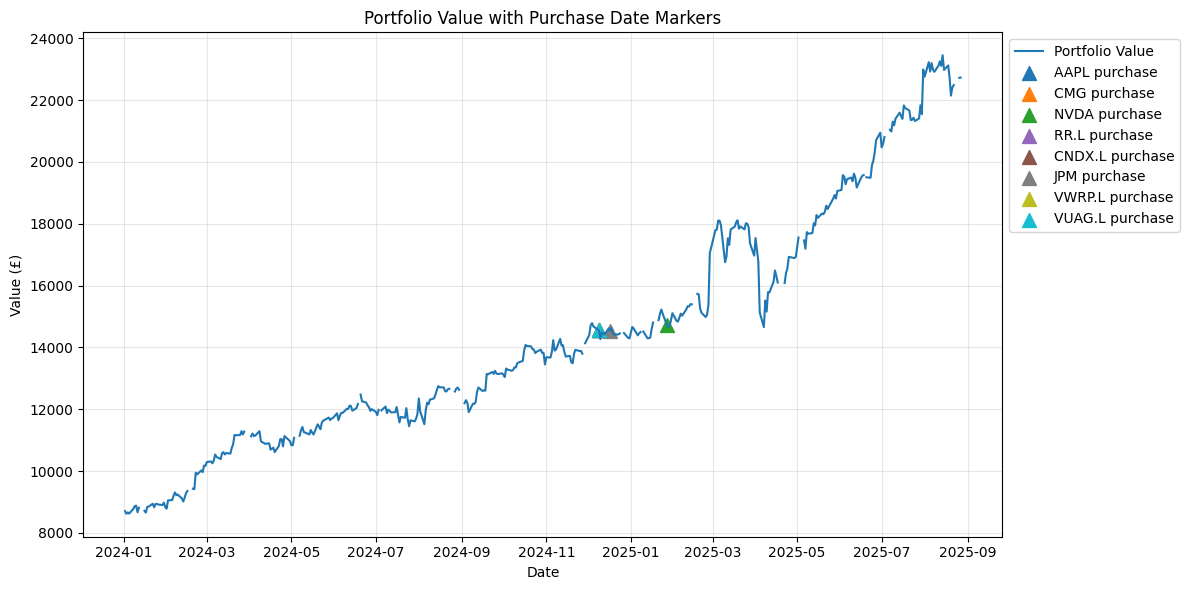

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label="Portfolio Value")
plt.title("Portfolio Value with Purchase Date Markers")
plt.xlabel("Date")
plt.ylabel("Value (£)")

colors = plt.cm.tab10(np.linspace(0, 1, len(holdings)))
for i, (ticker, purchase_date) in enumerate(purchase_dates.items()):
    pd_date = pd.to_datetime(purchase_date)
    if pd_date in portfolio_value.index:
        plt.scatter(pd_date, portfolio_value[pd_date], 
                   marker='^', s=100, color=colors[i], 
                   label=f"{ticker} purchase")
    else:
        
        closest_date = portfolio_value.index[portfolio_value.index >= pd_date][0]
        plt.scatter(closest_date, portfolio_value[closest_date], 
                   marker='^', s=100, color=colors[i], 
                   label=f"{ticker} purchase")

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

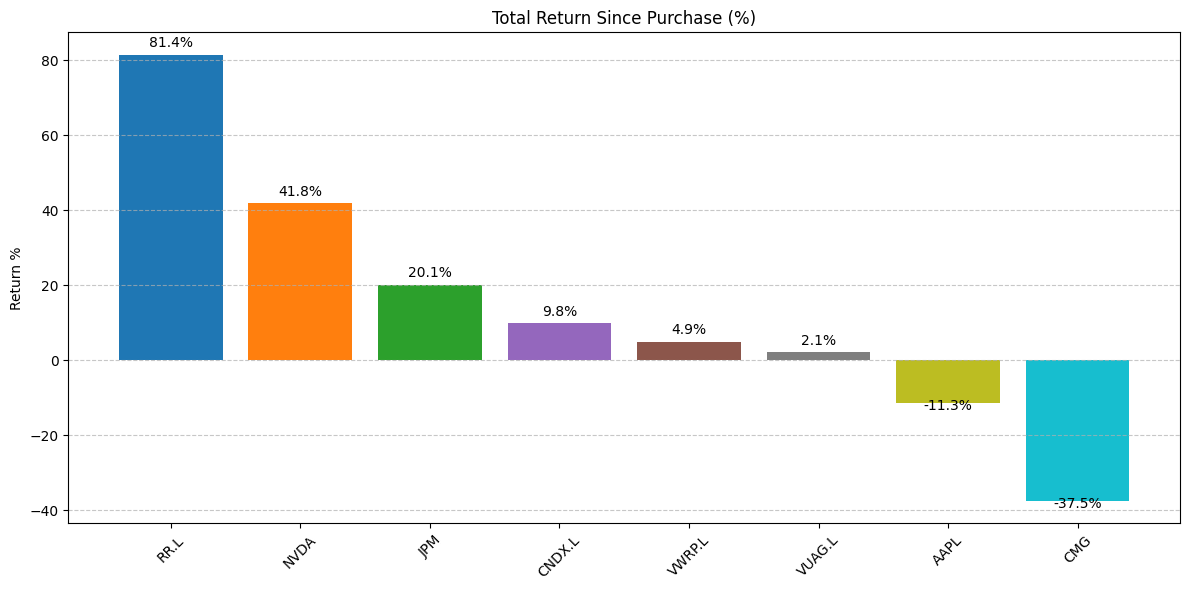

In [ ]:

plt.figure(figsize=(12, 6))
plt.bar(performance_df['Ticker'], performance_df['Total Return %'], 
       color=plt.cm.tab10(np.linspace(0, 1, len(performance_df))))
plt.title("Total Return Since Purchase (%)")
plt.ylabel("Return %")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

for i, val in enumerate(performance_df['Total Return %']):
    plt.text(i, val + np.sign(val)*2, f"{val:.1f}%", ha='center')

plt.tight_layout()
plt.show()

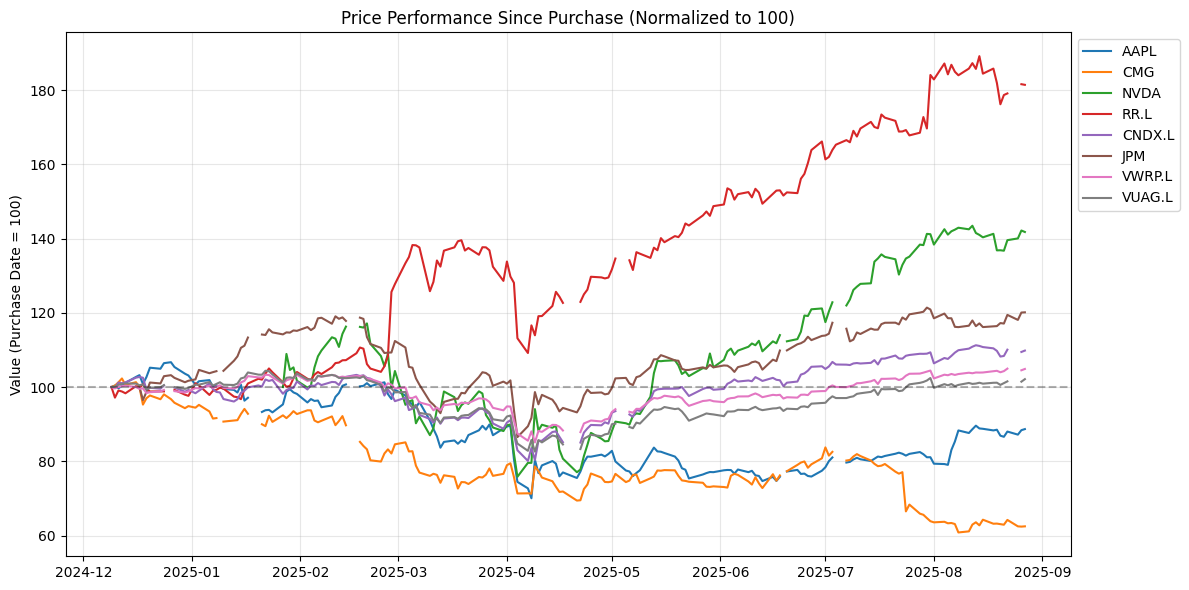

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Price Performance Since Purchase (Normalized to 100)")
plt.ylabel("Value (Purchase Date = 100)")

for ticker in holdings.keys():
    pd_date = pd.to_datetime(purchase_dates[ticker])
    
    
    if pd_date < df.index[0]:
        first_date = df.index[0]
    else:
        first_date = df.index[df.index >= pd_date][0]
    
    
    norm_price = 100 * df[f"{ticker}_Adj Close"] / df[f"{ticker}_Adj Close"][first_date]
    
    
    norm_price = norm_price[norm_price.index >= first_date]
    plt.plot(norm_price, label=ticker)

plt.axhline(y=100, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [90]:

performance_df[['Ticker', 'Purchase Date', 'Days Held', 'Total Return %', 'Annualized Return %']].style.format({
    'Total Return %': '{:.2f}%',
    'Annualized Return %': '{:.2f}%'
})

,Ticker,Purchase Date,Days Held,Total Return %,Annualized Return %
3,RR.L,2024-12-09,262,81.43%,129.43%
2,NVDA,2025-01-25,215,41.78%,80.95%
5,JPM,2024-12-17,254,20.13%,30.18%
4,CNDX.L,2024-12-09,262,9.83%,13.96%
6,VWRP.L,2024-12-09,262,4.87%,6.86%
7,VUAG.L,2024-12-09,262,2.12%,2.97%
0,AAPL,2024-12-09,262,-11.33%,-15.44%
1,CMG,2024-12-09,262,-37.53%,-48.10%


/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_42887/80828172.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = adj_close.pct_change().dropna()


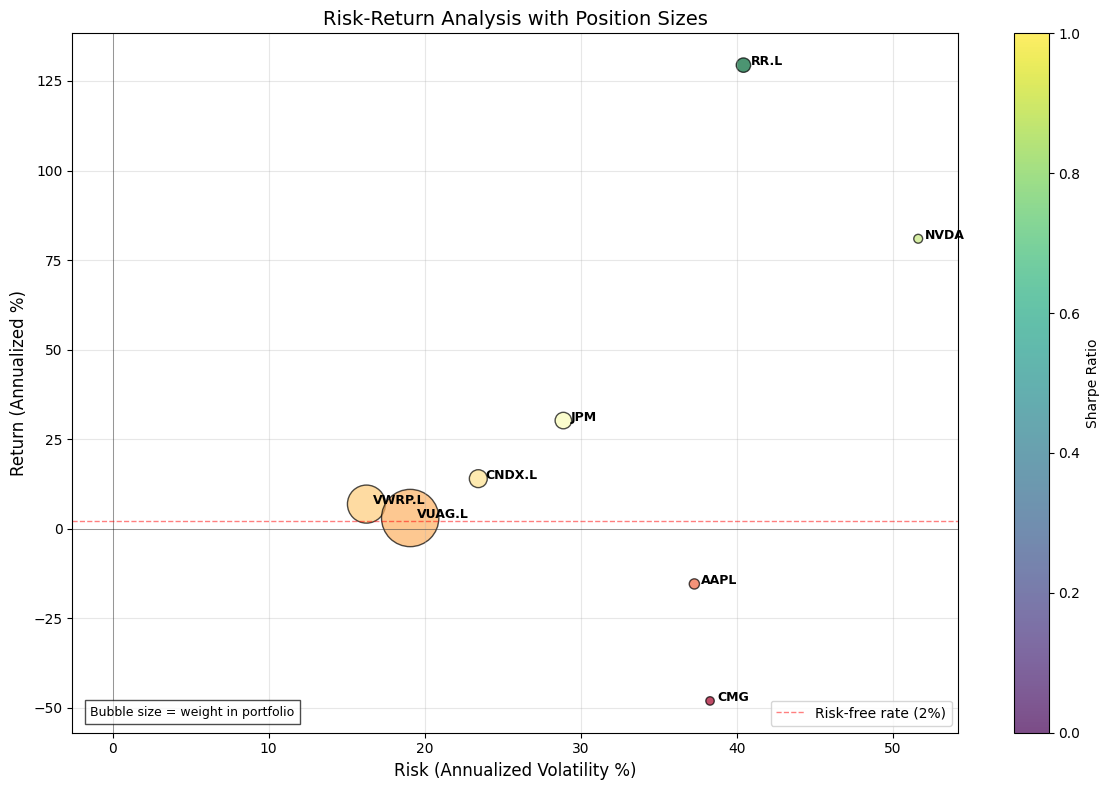

,Ticker,Weight,Annualized Return,Volatility,Sharpe Ratio,Position Size
3,RR.L,3.58%,129.43%,40.43%,3.15,£179.03
2,NVDA,1.36%,80.95%,51.63%,1.53,£68.05
5,JPM,4.71%,30.18%,28.89%,0.98,£235.59
4,CNDX.L,5.55%,13.96%,23.44%,0.51,£277.80
6,VWRP.L,25.03%,6.86%,16.27%,0.30,£1253.34
7,VUAG.L,56.75%,2.97%,19.07%,0.05,£2841.34
0,AAPL,1.80%,-15.44%,37.28%,-0.47,£90.14
1,CMG,1.23%,-48.10%,38.29%,-1.31,£61.48


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tickers = list(holdings.keys())
purchase_dates_series = pd.to_datetime(pd.Series(purchase_dates))


adj_close = pd.DataFrame({
    ticker: df.loc[df.index >= purchase_dates_series[ticker], f"{ticker}_Adj Close"]
    for ticker in tickers
})

daily_returns = adj_close.pct_change().dropna()
volatility = daily_returns.std() * np.sqrt(252) * 100
annualized_return = performance_df.set_index('Ticker').loc[tickers, 'Annualized Return %']

current_values_series = pd.Series(current_values)
total_value = current_values_series.sum()
weights = current_values_series / total_value * 100  # percent

sharpe = (annualized_return - 2) / volatility

risk_df = pd.DataFrame({
    'Ticker': tickers,
    'Weight': weights.values,
    'Annualized Return': annualized_return.values,
    'Volatility': volatility.values,
    'Sharpe Ratio': sharpe.values,
    'Position Size': current_values_series.values
})


plt.figure(figsize=(12, 8))
colors = plt.cm.RdYlGn((sharpe - sharpe.min()) / (sharpe.max() - sharpe.min()))
scatter = plt.scatter(risk_df['Volatility'], risk_df['Annualized Return'], 
                      s=risk_df['Weight'] * 30, c=colors, alpha=0.7, edgecolors='black')

for _, row in risk_df.iterrows():
    plt.annotate(row['Ticker'], xy=(row['Volatility'], row['Annualized Return']),
                 xytext=(5, 0), textcoords='offset points', fontsize=9, fontweight='bold')

plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
plt.axhline(y=2, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Risk-free rate (2%)')

plt.title('Risk-Return Analysis with Position Sizes', fontsize=14)
plt.xlabel('Risk (Annualized Volatility %)', fontsize=12)
plt.ylabel('Return (Annualized %)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.legend()
plt.text(0.02, 0.02, "Bubble size = weight in portfolio", transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', bbox=dict(facecolor='white', alpha=0.7))
plt.tight_layout()
plt.show()


risk_df.sort_values('Sharpe Ratio', ascending=False).style.format({
    'Weight': '{:.2f}%',
    'Annualized Return': '{:.2f}%',
    'Volatility': '{:.2f}%',
    'Sharpe Ratio': '{:.2f}',
    'Position Size': '£{:.2f}'
})